In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print('Train:', df_train.shape)
print('Test:', df_test.shape)

Train: (3000, 23)
Test: (4398, 22)


In [3]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

# NaN

## Train

In [4]:
nan_series = df_train.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_train.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
1,belongs_to_collection,2396,0.798667
4,homepage,2054,0.684667
17,tagline,597,0.199000
19,Keywords,276,0.092000
11,production_companies,156,0.052000
12,production_countries,55,0.018333
15,spoken_languages,20,0.006667
21,crew,16,0.005333
20,cast,13,0.004333
8,overview,8,0.002667


In [5]:
drop_cols = ['belongs_to_collection', 'homepage', # many NaNs
             'overview', 'tagline', 'title', 'original_title', # NLP
             'poster_path', 'imdb_id'] # unused

df_train.drop(drop_cols, axis = 1, inplace = True)
df_test.drop(drop_cols, axis = 1, inplace = True)

print('Train:', df_train.shape)
print('Test:', df_test.shape)

Train: (3000, 15)
Test: (4398, 14)


In [6]:
nan_series = df_train.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_train.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
11,Keywords,276,0.092000
5,production_companies,156,0.052000
6,production_countries,55,0.018333
9,spoken_languages,20,0.006667
13,crew,16,0.005333
12,cast,13,0.004333
2,genres,7,0.002333
8,runtime,2,0.000667
0,id,0,0.000000
1,budget,0,0.000000


In [7]:
df_train['Keywords'].fillna('[]', inplace = True)
df_train['production_companies'].fillna('[]', inplace = True)
df_train['production_countries'].fillna('[]', inplace = True)
df_train['spoken_languages'].fillna('[]', inplace = True)
df_train['crew'].fillna('[]', inplace = True)
df_train['cast'].fillna('[]', inplace = True)
df_train['genres'].fillna('[]', inplace = True)

df_train['runtime'].fillna(df_train['runtime'].mean().item(), inplace = True)

df_train.isna().sum()

id                      0
budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
status                  0
Keywords                0
cast                    0
crew                    0
revenue                 0
dtype: int64

## Test

In [8]:
nan_series = df_test.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_test.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
11,Keywords,393,0.089359
5,production_companies,258,0.058663
6,production_countries,102,0.023192
9,spoken_languages,42,0.009550
13,crew,22,0.005002
2,genres,16,0.003638
12,cast,13,0.002956
8,runtime,4,0.000910
10,status,2,0.000455
7,release_date,1,0.000227


In [9]:
df_test['Keywords'].fillna('[]', inplace = True)
df_test['production_companies'].fillna('[]', inplace = True)
df_test['production_countries'].fillna('[]', inplace = True)
df_test['spoken_languages'].fillna('[]', inplace = True)
df_test['crew'].fillna('[]', inplace = True)
df_test['cast'].fillna('[]', inplace = True)
df_test['genres'].fillna('[]', inplace = True)

df_test['runtime'].fillna(df_train['runtime'].mean().item(), inplace = True)
df_test['status'].fillna('Released', inplace = True)
df_test['status'].replace('Post Production', 'Released', inplace = True)

df_test.isna().sum()

id                      0
budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            1
runtime                 0
spoken_languages        0
status                  0
Keywords                0
cast                    0
crew                    0
dtype: int64

In [10]:
df_test[df_test['release_date'].isna()]

,id,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast,crew
828,3829,0,"[{'id': 18, 'name': 'Drama'}]",en,0.009057,[],[],NaN,90.0,[],Released,[],[],[]


In [11]:
df_test['release_date'].fillna('03/20/01', inplace = True)
df_test.loc[828]

id                                               3829
budget                                              0
genres                  [{'id': 18, 'name': 'Drama'}]
original_language                                  en
popularity                                   0.009057
production_companies                               []
production_countries                               []
release_date                                 03/20/01
runtime                                            90
spoken_languages                                   []
status                                       Released
Keywords                                           []
cast                                               []
crew                                               []
Name: 828, dtype: object

## Merge sets

In [12]:
train_labels = df_train.pop('revenue')
df_full = pd.concat([df_train, df_test], keys = ['train', 'test'])
df_full.shape

(7398, 14)

In [13]:
df_full.head()

id    budget                                             genres  \
train 0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
      1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
      2   3   3300000                      [{'id': 18, 'name': 'Drama'}]   
      3   4   1200000  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
      4   5         0  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

        original_language  popularity  \
train 0                en    6.575393   
      1                en    8.248895   
      2                en   64.299990   
      3                hi    3.174936   
      4                ko    1.148070   

                                      production_companies  \
train 0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
      1        [{'name': 'Walt Disney Pictures', 'id': 2}]   
      2  [{'name': 'Bold Films', 'id': 2266}, {'name': ...   
      3                                                 []   
      4                                                 []   

                                      production_countries release_date  \
train 0  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15   
      1  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04   
      2  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14   
      3            [{'iso_3166_1': 'IN', 'name': 'India'}]       3/9/12   
      4      [{'iso_3166_1': 'KR', 'name': 'South Korea'}]       2/5/09   

         runtime                                   spoken_languages    status  \
train 0     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      1    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      2    105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      3    122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
      4    118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                                  Keywords  \
train 0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
      1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
      2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
      3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
      4                                                 []   

                                                      cast  \
train 0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
      1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
      2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
      3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
      4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                      crew  
train 0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  
      1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  
      2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  
      3  [{'credit_id': '52fe48779251416c9108d6eb', 'de...  
      4  [{'credit_id': '52fe464b9251416c75073b43', 'de...

# Categorical Features

In [14]:
df_features = df_full[['id', 'budget', 'original_language', 'popularity', 'runtime', 'release_date', 'status']]
df_features.head()

id    budget original_language  popularity  runtime release_date  \
train 0   1  14000000                en    6.575393     93.0      2/20/15   
      1   2  40000000                en    8.248895    113.0       8/6/04   
      2   3   3300000                en   64.299990    105.0     10/10/14   
      3   4   1200000                hi    3.174936    122.0       3/9/12   
      4   5         0                ko    1.148070    118.0       2/5/09   

           status  
train 0  Released  
      1  Released  
      2  Released  
      3  Released  
      4  Released

## Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_features['original_language'] = le.fit_transform(df_features['original_language'])
df_features['status'] = le.fit_transform(df_features['status'])

## Time Features

In [16]:
df_features['release_date'] = pd.to_datetime(df_features['release_date'])
df_features['release_year'] = df_features['release_date'].dt.year
df_features['release_month'] = df_features['release_date'].dt.month
df_features['release_quarter'] = df_features['release_date'].dt.quarter
df_features.drop(['release_date'], axis = 1, inplace = True)

df_features.head()

id    budget  original_language  popularity  runtime  status  \
train 0   1  14000000                 10    6.575393     93.0       0   
      1   2  40000000                 10    8.248895    113.0       0   
      2   3   3300000                 10   64.299990    105.0       0   
      3   4   1200000                 16    3.174936    122.0       0   
      4   5         0                 24    1.148070    118.0       0   

         release_year  release_month  release_quarter  
train 0          2015              2                1  
      1          2004              8                3  
      2          2014             10                4  
      3          2012              3                1  
      4          2009              2                1

## Production Companies

In [17]:
def extract_dict(dict_str):
    dict_res = dict_str.replace('[', '').replace(']', '')
    dict_res = dict_res.replace('}, {', '};{')
    dict_res = dict_res.split(';')
    return dict_res

In [18]:
from ast import literal_eval

production_companies = set()

for item in df_full['production_companies']:
    if item == '[]':
        continue
    companies_dict = extract_dict(item)
    for company in companies_dict:
        production_companies.add(literal_eval(company)['name'].lower())
    
len(production_companies)

7069

In [19]:
company_counts = pd.DataFrame(index = production_companies)
company_counts['counts'] = 0

for item in df_full['production_companies']:
    if item == '[]':
        continue
    companies_dict = extract_dict(item)
    for company in companies_dict:
        company_id = literal_eval(company)['name'].lower()
        company_counts['counts'].loc[company_id] += 1
        
company_counts.sort_values('counts', ascending = False).head(10)

,counts
warner bros.,491
universal pictures,463
paramount pictures,393
twentieth century fox film corporation,341
columbia pictures,236
metro-goldwyn-mayer (mgm),207
new line cinema,198
touchstone pictures,158
walt disney pictures,147
columbia pictures corporation,140


In [20]:
company_counts.sort_values('counts', ascending = False).to_csv('company_counts.csv')

In [21]:
companies = pd.read_csv('company_counts_cleaned.csv')
companies = companies[companies['counts'] > 50]
companies = list(companies['Unnamed: 0'])
print(len(companies))
companies

38


['warner',
 'universal',
 'paramount',
 'columbia pictures',
 '20th century fox',
 '21st century',
 'twentieth century fox',
 'disney',
 'metro-goldwyn-mayer',
 'new line',
 'canal',
 'touchstone pictures',
 'fox',
 'dreamworks',
 'tristar',
 'lions gate',
 'lionsgate',
 'miramax',
 'relativity media',
 'united artists',
 'dune',
 'france',
 'village roadshow',
 'regency',
 'sony',
 'amblin',
 'bbc',
 'dc comics',
 'dc entertainment',
 'studiocanal',
 'orion pictures',
 'working title films',
 'dimension films',
 'summit entertainment',
 'hollywood pictures',
 'imagine',
 'marvel',
 'ingenious']

In [22]:
for comp in companies:
    col_name = 'pc_' + comp
    df_features[col_name] = 0
    
print(df_features.shape)
df_features.head()

(7398, 47)


id    budget  original_language  popularity  runtime  status  \
train 0   1  14000000                 10    6.575393     93.0       0   
      1   2  40000000                 10    8.248895    113.0       0   
      2   3   3300000                 10   64.299990    105.0       0   
      3   4   1200000                 16    3.174936    122.0       0   
      4   5         0                 24    1.148070    118.0       0   

         release_year  release_month  release_quarter  pc_warner  \
train 0          2015              2                1          0   
      1          2004              8                3          0   
      2          2014             10                4          0   
      3          2012              3                1          0   
      4          2009              2                1          0   

         pc_universal  pc_paramount  pc_columbia pictures  \
train 0             0             0                     0   
      1             0             0                     0   
      2             0             0                     0   
      3             0             0                     0   
      4             0             0                     0   

         pc_20th century fox  pc_21st century  pc_twentieth century fox  \
train 0                    0                0                         0   
      1                    0                0                         0   
      2                    0                0                         0   
      3                    0                0                         0   
      4                    0                0                         0   

         pc_disney  pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
train 0          0                       0            0         0   
      1          0                       0            0         0   
      2          0                       0            0         0   
      3          0                       0            0         0   
      4          0                       0            0         0   

         pc_touchstone pictures  pc_fox  pc_dreamworks  pc_tristar  \
train 0                       0       0              0           0   
      1                       0       0              0           0   
      2                       0       0              0           0   
      3                       0       0              0           0   
      4                       0       0              0           0   

         pc_lions gate  pc_lionsgate  pc_miramax  pc_relativity media  \
train 0              0             0           0                    0   
      1              0             0           0                    0   
      2              0             0           0                    0   
      3              0             0           0                    0   
      4              0             0           0                    0   

         pc_united artists  pc_dune  pc_france  pc_village roadshow  \
train 0                  0        0          0                    0   
      1                  0        0          0                    0   
      2                  0        0          0                    0   
      3                  0        0          0                    0   
      4                  0        0          0                    0   

         pc_regency  pc_sony  pc_amblin  pc_bbc  pc_dc comics  \
train 0           0        0          0       0             0   
      1           0        0          0       0             0   
      2           0        0          0       0             0   
      3           0        0          0       0             0   
      4           0        0          0       0             0   

         pc_dc entertainment  pc_studiocanal  pc_orion pictures  \
train 0                    0               0                  0   
      1                    0               0                  0   
      2                    0               0     

In [23]:
from time import time

t = time()
count = 0
for index, row in df_full.iterrows():
    count += 1
    if count % 100 == 0:
        print(count, end = ' ')
    for comp in companies:
        col_name = 'pc_' + comp
        if comp in row['production_companies'].lower():
            df_features[col_name].loc[index] = 1
            
print()
print('Time elapsed:', time() - t)
df_features.head()

100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 
Time elapsed: 149.6676061153412


id    budget  original_language  popularity  runtime  status  \
train 0   1  14000000                 10    6.575393     93.0       0   
      1   2  40000000                 10    8.248895    113.0       0   
      2   3   3300000                 10   64.299990    105.0       0   
      3   4   1200000                 16    3.174936    122.0       0   
      4   5         0                 24    1.148070    118.0       0   

         release_year  release_month  release_quarter  pc_warner  \
train 0          2015              2                1          0   
      1          2004              8                3          0   
      2          2014             10                4          0   
      3          2012              3                1          0   
      4          2009              2                1          0   

         pc_universal  pc_paramount  pc_columbia pictures  \
train 0             0             1                     0   
      1             0             0                     0   
      2             0             0                     0   
      3             0             0                     0   
      4             0             0                     0   

         pc_20th century fox  pc_21st century  pc_twentieth century fox  \
train 0                    0                0                         0   
      1                    0                0                         0   
      2                    0                0                         0   
      3                    0                0                         0   
      4                    0                0                         0   

         pc_disney  pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
train 0          0                       1            0         0   
      1          1                       0            0         0   
      2          0                       0            0         0   
      3          0                       0            0         0   
      4          0                       0            0         0   

         pc_touchstone pictures  pc_fox  pc_dreamworks  pc_tristar  \
train 0                       0       0              0           0   
      1                       0       0              0           0   
      2                       0       0              0           0   
      3                       0       0              0           0   
      4                       0       0              0           0   

         pc_lions gate  pc_lionsgate  pc_miramax  pc_relativity media  \
train 0              0             0           0                    0   
      1              0             0           0                    0   
      2              0             0           0                    0   
      3              0             0           0                    0   
      4              0             0           0                    0   

         pc_united artists  pc_dune  pc_france  pc_village roadshow  \
train 0                  1        0          0                    0   
      1                  0        0          0                    0   
      2                  0        0          0                    0   
      3                  0        0          0                    0   
      4                  0        0          0                    0   

         pc_regency  pc_sony  pc_amblin  pc_bbc  pc_dc comics  \
train 0           0        0          0       0             0   
      1           0        0          0       0             0   
      2           0        0          0       0             0   
      3           0        0          0       0             0   
      4           0        0          0       0             0   

         pc_dc entertainment  pc_studiocanal  pc_orion pictures  \
train 0                    0               0                  0   
      1                    0               0                  0   
      2                    0               0     

In [24]:
companies

['warner',
 'universal',
 'paramount',
 'columbia pictures',
 '20th century fox',
 '21st century',
 'twentieth century fox',
 'disney',
 'metro-goldwyn-mayer',
 'new line',
 'canal',
 'touchstone pictures',
 'fox',
 'dreamworks',
 'tristar',
 'lions gate',
 'lionsgate',
 'miramax',
 'relativity media',
 'united artists',
 'dune',
 'france',
 'village roadshow',
 'regency',
 'sony',
 'amblin',
 'bbc',
 'dc comics',
 'dc entertainment',
 'studiocanal',
 'orion pictures',
 'working title films',
 'dimension films',
 'summit entertainment',
 'hollywood pictures',
 'imagine',
 'marvel',
 'ingenious']

In [30]:
df_features['pc_century_fox'] = df_features['pc_20th century fox'] | df_features['pc_21st century'] | df_features['pc_twentieth century fox']
df_features['pc_lions_gate'] = df_features['pc_lions gate'] | df_features['pc_lionsgate']
df_features['pc_dc'] = df_features['pc_dc comics'] | df_features['pc_dc entertainment']

df_features.drop(['pc_20th century fox', 'pc_21st century', 'pc_twentieth century fox',
                  'pc_lions gate', 'pc_lionsgate', 'pc_dc comics', 'pc_dc entertainment'],
                  axis = 1, inplace = True)

df_features.shape

(7398, 43)

## Genres

In [31]:
genres = set()

for item in df_full['genres']:
    if item == '[]':
        continue
    genres_dict = extract_dict(item)
    for genre in genres_dict:
        genres.add(literal_eval(genre)['name'])
    
genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [32]:
for genre in genres:
    col_name = 'genre_' + genre
    df_features[col_name] = 0
    
df_features.head()

id    budget  original_language  popularity  runtime  status  \
train 0   1  14000000                 10    6.575393     93.0       0   
      1   2  40000000                 10    8.248895    113.0       0   
      2   3   3300000                 10   64.299990    105.0       0   
      3   4   1200000                 16    3.174936    122.0       0   
      4   5         0                 24    1.148070    118.0       0   

         release_year  release_month  release_quarter  pc_warner  \
train 0          2015              2                1          0   
      1          2004              8                3          0   
      2          2014             10                4          0   
      3          2012              3                1          0   
      4          2009              2                1          0   

         pc_universal  pc_paramount  pc_columbia pictures  pc_disney  \
train 0             0             1                     0          0   
      1             0             0                     0          1   
      2             0             0                     0          0   
      3             0             0                     0          0   
      4             0             0                     0          0   

         pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
train 0                       1            0         0   
      1                       0            0         0   
      2                       0            0         0   
      3                       0            0         0   
      4                       0            0         0   

         pc_touchstone pictures  pc_fox  pc_dreamworks  pc_tristar  \
train 0                       0       0              0           0   
      1                       0       0              0           0   
      2                       0       0              0           0   
      3                       0       0              0           0   
      4                       0       0              0           0   

         pc_miramax  pc_relativity media  pc_united artists  pc_dune  \
train 0           0                    0                  1        0   
      1           0                    0                  0        0   
      2           0                    0                  0        0   
      3           0                    0                  0        0   
      4           0                    0                  0        0   

         pc_france  pc_village roadshow  pc_regency  pc_sony  pc_amblin  \
train 0          0                    0           0        0          0   
      1          0                    0           0        0          0   
      2          0                    0           0        0          0   
      3          0                    0           0        0          0   
      4          0                    0           0        0          0   

         pc_bbc  pc_studiocanal  pc_orion pictures  pc_working title films  \
train 0       0               0                  0                       0   
      1       0               0                  0                       0   
      2       0               0                  0                       0   
      3       0               0                  0                       0   
      4       0               0                  0                       0   

         pc_dimension films  pc_summit entertainment  pc_hollywood pictures  \
train 0                   0                        0                      0   
      1                   0                        0                      0   
      2                   0                        0                      0   
      3                   0                        0                      0   
      4                   0                        0                      0   

         pc_imagine  pc_marvel  pc_ingenious  pc_century_fox  pc_lions_gate  \
train 0           0          0             0       

In [33]:
from time import time

t = time()
count = 0
for index, row in df_full.iterrows():
    count += 1
    if count % 100 == 0:
        print(count, end = ' ')
    for genre in genres:
        col_name = 'genre_' + genre
        if genre in row['genres']:
            df_features[col_name].loc[index] = 1
            
print()
print('Time elapsed:', time() - t)
df_features.head()

100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 
Time elapsed: 508.0478940010071


id    budget  original_language  popularity  runtime  status  \
train 0   1  14000000                 10    6.575393     93.0       0   
      1   2  40000000                 10    8.248895    113.0       0   
      2   3   3300000                 10   64.299990    105.0       0   
      3   4   1200000                 16    3.174936    122.0       0   
      4   5         0                 24    1.148070    118.0       0   

         release_year  release_month  release_quarter  pc_warner  \
train 0          2015              2                1          0   
      1          2004              8                3          0   
      2          2014             10                4          0   
      3          2012              3                1          0   
      4          2009              2                1          0   

         pc_universal  pc_paramount  pc_columbia pictures  pc_disney  \
train 0             0             1                     0          0   
      1             0             0                     0          1   
      2             0             0                     0          0   
      3             0             0                     0          0   
      4             0             0                     0          0   

         pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
train 0                       1            0         0   
      1                       0            0         0   
      2                       0            0         0   
      3                       0            0         0   
      4                       0            0         0   

         pc_touchstone pictures  pc_fox  pc_dreamworks  pc_tristar  \
train 0                       0       0              0           0   
      1                       0       0              0           0   
      2                       0       0              0           0   
      3                       0       0              0           0   
      4                       0       0              0           0   

         pc_miramax  pc_relativity media  pc_united artists  pc_dune  \
train 0           0                    0                  1        0   
      1           0                    0                  0        0   
      2           0                    0                  0        0   
      3           0                    0                  0        0   
      4           0                    0                  0        0   

         pc_france  pc_village roadshow  pc_regency  pc_sony  pc_amblin  \
train 0          0                    0           0        0          0   
      1          0                    0           0        0          0   
      2          0                    0           0        0          0   
      3          0                    0           0        0          0   
      4          0                    0           0        0          0   

         pc_bbc  pc_studiocanal  pc_orion pictures  pc_working title films  \
train 0       0               0                  0                       0   
      1       0               0                  0                       0   
      2       0               0                  0                       0   
      3       0               0                  0                       0   
      4       0               0                  0                       0   

         pc_dimension films  pc_summit entertainment  pc_hollywood pictures  \
train 0                   0                        0                      0   
      1                   0                        0                      0   
      2                   0                        0                      0   
      3                   0                        0                      0   
      4                   0                        0                      0   

         pc_imagine  pc_marvel  pc_ingenious  pc_century_fox  pc_lions_gate  \
train 0           0          0             0       

# Target

In [34]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm

def plot_norm(col_name):
    sns.distplot(df_full[col_name], fit = norm)
    fig = plt.figure()
    
def log_transform(col_name, extract_zero = False):
    plot_norm(col_name)
    
    if extract_zero:
        df_full['temp'] = 0
        df_full.loc[df_full[col_name] > 0, 'temp'] = 1
        df_full.loc[df_full['temp'] == 1, col_name] = np.log(df_full[col_name])
        df_full.drop(['temp'], axis = 1, inplace = True)
    else:
        df_full[col_name] = np.log(df_full[col_name])
        
    plot_norm(col_name)

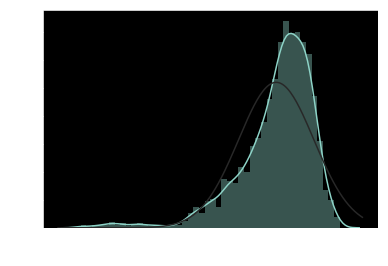

In [35]:
train_labels_log = np.log(train_labels)
sns.distplot(train_labels_log, fit = norm)

# Model

In [36]:
from sklearn.model_selection import train_test_split

train_set = df_features.loc['train']
train_set.drop(['id'], axis = 1, inplace = True)
test_set = df_features.loc['test']


x_train, x_val, y_train, y_val = train_test_split(train_set, train_labels_log, test_size = 0.2, random_state = 1)
print('Train:', x_train.shape, y_train.shape)
print('Val:', x_val.shape, y_val.shape)

Train: (2400, 62) (2400,)
Val: (600, 62) (600,)


In [37]:
import lightgbm as lgb
import gc

train_ds = lgb.Dataset(x_train, label = y_train)
val_ds = lgb.Dataset(x_val, label = y_val)

watchlist = [train_ds, val_ds]

params = {
    'learning_rate': 0.01, 
    'boosting': 'gbdt', 
    'objective': 'regression', 
    'max_depth': -1,
    'seed': 191, 
    'num_leaves': 31,
    'metric': 'rmse',
    'nthreads': 8,
    'lambda_l1': 0.005,
    'verbose': -1
}

def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)
    return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2)))

gc.collect()

0

In [38]:
lgb_model = lgb.train(params, train_ds, 700,
                      valid_sets = watchlist, verbose_eval = 20)

[20]	training's rmse: 2.84269	valid_1's rmse: 2.54835
[40]	training's rmse: 2.62775	valid_1's rmse: 2.34713
[60]	training's rmse: 2.45992	valid_1's rmse: 2.2062
[80]	training's rmse: 2.3293	valid_1's rmse: 2.10951
[100]	training's rmse: 2.22729	valid_1's rmse: 2.04239
[120]	training's rmse: 2.14597	valid_1's rmse: 2.00288
[140]	training's rmse: 2.0783	valid_1's rmse: 1.97525
[160]	training's rmse: 2.02207	valid_1's rmse: 1.95982
[180]	training's rmse: 1.97444	valid_1's rmse: 1.9479
[200]	training's rmse: 1.93305	valid_1's rmse: 1.93871
[220]	training's rmse: 1.89716	valid_1's rmse: 1.93222
[240]	training's rmse: 1.86524	valid_1's rmse: 1.92949
[260]	training's rmse: 1.83416	valid_1's rmse: 1.92458
[280]	training's rmse: 1.80607	valid_1's rmse: 1.9259
[300]	training's rmse: 1.78098	valid_1's rmse: 1.92561
[320]	training's rmse: 1.75585	valid_1's rmse: 1.9244
[340]	training's rmse: 1.73303	valid_1's rmse: 1.92296
[360]	training's rmse: 1.71199	valid_1's rmse: 1.92139
[380]	training's rms

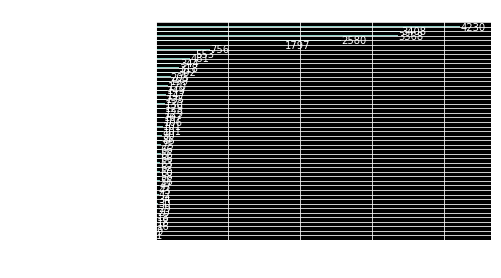

In [39]:
lgb.plot_importance(lgb_model)

In [40]:
val_preds = lgb_model.predict(x_val)
rmsle(val_preds, y_val)

1.9310435004960083

# Test set

In [41]:
test_id = test_set.pop('id')
test_id.head()

0    3001
1    3002
2    3003
3    3004
4    3005
Name: id, dtype: int64

In [42]:
test_set.isna().sum().max()

0

In [43]:
preds = lgb_model.predict(test_set)
preds = np.exp(preds)
print(preds.shape)
preds

(4398,)


array([ 9386643.72147343,  1190034.40071635,  7120452.9002308 , ...,
       54920308.43509325,  2316462.42005767,  2223204.84382197])

In [44]:
submission = pd.DataFrame({'id': test_id, 'revenue': preds})
submission.head()

,id,revenue
0,3001,9.386644e+06
1,3002,1.190034e+06
2,3003,7.120453e+06
3,3004,3.112622e+06
4,3005,7.893557e+05


In [45]:
submission.to_csv('submission.csv', index = False)